In [6]:
import matplotlib.pyplot as plt
from glob import glob
import cv2
import random
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import LSTM

from IPython.display import SVG, Image
import tensorflow as tf
print("Tensorflow version:", tf.__version__)


img_size =48
batch_size= 64
datagen_train = ImageDataGenerator()
train_generator = datagen_train.flow_from_directory("train/" ,
                                                   target_size = (img_size,img_size),
                                                    color_mode = "grayscale",
                                                    batch_size =batch_size,
                                                    class_mode = "categorical" ,
                                                    shuffle =True)

datagen_validation = ImageDataGenerator()
validation_generator = datagen_train.flow_from_directory("test/",
                                                   target_size = (img_size,img_size),
                                                   color_mode = "grayscale",
                                                   batch_size = batch_size,
                                                   class_mode = "categorical",
                                                   shuffle = True)
                                                    

Tensorflow version: 2.14.0
Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [2]:
# import tensorflow as tf
# from tensorflow.keras import layers, models

# # Define the CNN-BiLSTM model
# model = models.Sequential()

# # # Convolutional layers
# model.add(layers.Conv2D(32, (3, 3), strides=(1, 1), padding='same', activation='elu', input_shape=(48, 48,1)))
# # model.add(layers.Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='elu'))
# model.add(Dropout(0.25))
# model.add(layers.MaxPooling2D((2, 2)))


# model.add(layers.Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='elu'))
# # model.add(layers.Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='elu'))
# model.add(Dropout(0.25))
# model.add(layers.MaxPooling2D((2, 2)))

# # model.add(layers.Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='elu'))
# # # model.add(layers.Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='elu'))
# # model.add(layers.MaxPooling2D((2, 2)))

# # model.add(layers.Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='elu'))
# # # model.add(layers.Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='elu'))
# # model.add(layers.MaxPooling2D((2, 2)))
# # model.add(layers.TimeDistributed(layers.Flatten()))
# # # model.add(layers.Conv2D(512, (3, 3), strides=(1, 1), padding='same', activation='elu'))
# # # model.add(layers.Conv2D(512, (3, 3), strides=(1, 1), padding='same', activation='elu'))
# model.add(layers.Flatten())
    
#     # reshape = Reshape((1, -1))(flatten)
# model.add(LSTM(200, activation='relu', return_sequences=True, input_shape=(48,48,1)))
# model.add(LSTM(100, activation='relu'))
# # model.add(Dense(1))
# # model.compile(optimizer='adam', loss='mse')
# # Bidirectional LSTM layer
# # model.add(layers.TimeDistributed(layers.Flatten()))
# # model.add(layers.Bidirectional(layers.LSTM(128, return_sequences=True)))

# # Flatten the output from Bidirectional LSTM
# model.add(layers.Flatten())

# # Fully connected layers
# model.add(layers.Dense(128, activation='relu'))
# model.add(layers.Dense(7, activation='softmax'))  # Assuming 7 emotion classes

# # Compile the model
# model.compile(optimizer=Adam(learning_rate =0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# # Print the model summary
# model.summary()


In [17]:
# import tensorflow as tf
# from tensorflow.keras import layers, models
# from tensorflow.keras.callbacks import ModelCheckpoint

# # Define the CNN-BiLSTM model
# model = models.Sequential()

# # Convolutional layers
# model.add(layers.Conv2D(32, (1, 1), strides=(1, 1), padding='same', activation='elu', input_shape=(48, 48, 1)))
# model.add(layers.Conv2D(32, (5, 5), strides=(1, 1), padding='same', activation='elu', input_shape=(48, 48, 1)))
# # model.add(layers.Dropout(0.25))
# model.add(layers.MaxPooling2D((3, 3)))

# model.add(layers.Conv2D(32, (3, 3), strides=(1, 1), padding='same', activation='elu'))
# # model.add(layers.Dropout(0.25))
# model.add(layers.MaxPooling2D((3, 3)))
# model.add(layers.Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='elu'))
# model.add(layers.MaxPooling2D((3, 3)))

# model.add(layers.Reshape((3, 64 * 3 * 3)))  # Reshape output of CNN for LSTM input
# model.add(layers.LSTM(128, return_sequences=True))
# # Flatten the output
# model.add(layers.Flatten())

# # Bidirectional LSTM layer
# model.add(layers.Reshape((1, -1)))  # Reshape for LSTM
# model.add(layers.LSTM(128, activation='relu', return_sequences=True))
# model.add(layers.LSTM(256, activation='relu',return_sequences = True))
# # model.add(layers.Flatten())
# # Fully connected layers
# model.add(layers.Dense(128, activation='relu'))
# model.add(layers.Dense(7, activation='softmax'))  # Assuming 7 emotion classes

# # Compile the model
# model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

# # Print the model summary
# model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 48, 48, 64)        640       
                                                                 
 dropout_14 (Dropout)        (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 24, 24, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 24, 24, 128)       73856     
                                                                 
 dropout_15 (Dropout)        (None, 24, 24, 128)       0         
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 12, 12, 128)       0         
 ng2D)                                                

In [9]:
from keras import models, layers
from keras import backend as K

# Define the model
model = models.Sequential()

# Convolutional layers
model.add(layers.Conv2D(32, (1, 1), strides=(1, 1), padding='same', activation='elu', input_shape=(48, 48, 1)))
model.add(layers.Conv2D(32, (5, 5), strides=(1, 1), padding='same', activation='elu'))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Conv2D(32, (3, 3), strides=(1, 1), padding='same', activation='elu'))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='elu'))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Reshape((1, -1)))  # Reshape for LSTM
model.add(layers.LSTM(128, activation='relu', return_sequences=True))
model.add(layers.LSTM(256, activation='relu',return_sequences = False))
# model.add(layers.Flatten())
# Fully connected layers
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(7, activation='softmax'))  # Assuming 7 emotion classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 48, 48, 32)        64        
                                                                 
 conv2d_31 (Conv2D)          (None, 48, 48, 32)        25632     
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_32 (Conv2D)          (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 5, 5, 32)          0         
 ng2D)                                                           
                                                                 
 conv2d_33 (Conv2D)          (None, 5, 5, 64)         

In [10]:
# Assuming you have defined train_generator and validation_generator properly
epochs = 15
steps_per_epoch = train_generator.n // train_generator.batch_size
validation_steps = validation_generator.n // validation_generator.batch_size

checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_accuracy', save_weights_only=True, mode='max', verbose=1)
callbacks = [checkpoint]

# Train the model
history = model.fit(
    x=train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=callbacks
)


Epoch 1/15
449/449 [==============================] - ETA: 0s - loss: 1.8065 - accuracy: 0.2497
Epoch 1: saving model to model_weights.h5
449/449 [==============================] - 315s 680ms/step - loss: 1.8065 - accuracy: 0.2497 - val_loss: 1.7951 - val_accuracy: 0.2497
Epoch 2/15
449/449 [==============================] - ETA: 0s - loss: 1.7602 - accuracy: 0.2698
Epoch 2: saving model to model_weights.h5
449/449 [==============================] - 299s 665ms/step - loss: 1.7602 - accuracy: 0.2698 - val_loss: 1.6928 - val_accuracy: 0.3090
Epoch 3/15
449/449 [==============================] - ETA: 0s - loss: 1.6649 - accuracy: 0.3297
Epoch 3: saving model to model_weights.h5
449/449 [==============================] - 299s 667ms/step - loss: 1.6649 - accuracy: 0.3297 - val_loss: 1.6185 - val_accuracy: 0.3516
Epoch 4/15
449/449 [==============================] - ETA: 0s - loss: 1.5615 - accuracy: 0.3879
Epoch 4: saving model to model_weights.h5
449/449 [==============================] - 

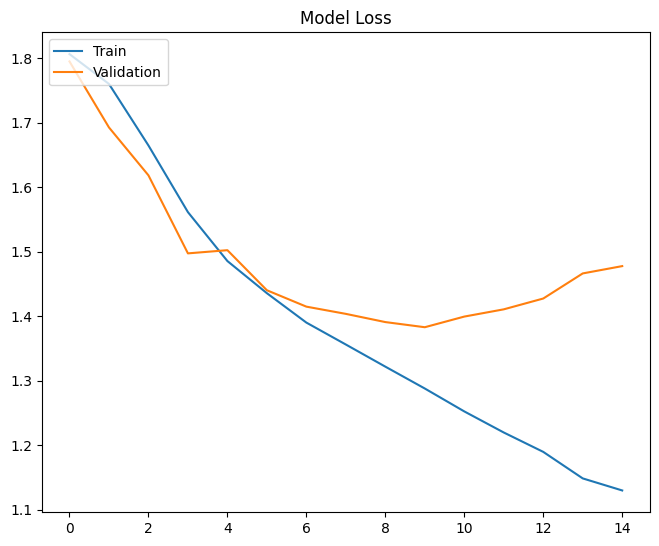

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right =0.95,left=0.0,hspace=0.25,wspace=0.35)

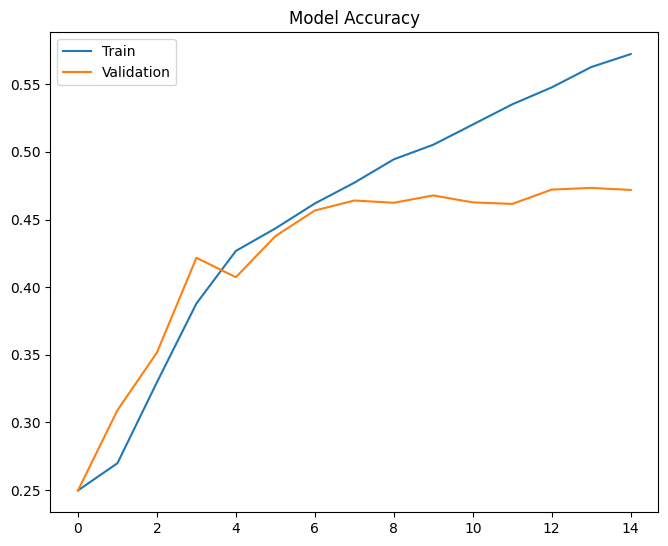

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right =0.95,left=0.0,hspace=0.25,wspace=0.35)

In [14]:
model_json = model.to_json()
with open("model_a1.json","w") as json_file:
    json_file.write(model_json)